In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [110]:
data = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [111]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
data.shape

(10000, 14)

In [113]:
data.duplicated().sum()

0

In [114]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [115]:
data['Geography'].value_counts() 
## it will tell us if the data is imbalanced or not when working professionally take care of imbalanced data

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [116]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [117]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [119]:
# for one hot-encoding

data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first = True).astype(int)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CreditScore        10000 non-null  int64
 1   Age                10000 non-null  int64
 2   Tenure             10000 non-null  int64
 3   Balance            10000 non-null  int64
 4   NumOfProducts      10000 non-null  int64
 5   HasCrCard          10000 non-null  int64
 6   IsActiveMember     10000 non-null  int64
 7   EstimatedSalary    10000 non-null  int64
 8   Exited             10000 non-null  int64
 9   Geography_Germany  10000 non-null  int64
 10  Geography_Spain    10000 non-null  int64
 11  Gender_Male        10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


In [121]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [122]:
X = data.drop(columns=['Exited'])
y = data['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [123]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146,2,0,1,124749,1,0,1
5140,626,29,4,105767,2,0,0,41104,0,0,0
2568,612,47,6,130024,1,1,1,45750,1,0,0
3671,646,52,6,111739,2,0,1,68367,1,0,0
7427,714,33,8,122017,1,0,0,162515,0,1,1


In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [126]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [127]:
## Neural network architecture

model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [130]:
h = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7689 - loss: 2.1844 - val_accuracy: 0.7675 - val_loss: 1.4614
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7666 - loss: 1.1568 - val_accuracy: 0.7625 - val_loss: 0.9902
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7569 - loss: 0.9248 - val_accuracy: 0.7729 - val_loss: 0.8509
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7331 - loss: 0.7213 - val_accuracy: 0.7725 - val_loss: 0.6381
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 0.6111 - val_accuracy: 0.7875 - val_loss: 0.5976
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7826 - loss: 0.6297 - val_accuracy: 0.7983 - val_loss: 0.5901
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.6648 - val_accuracy: 0.8042 - val_loss: 0.5818
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.5934 - val_accu

In [131]:
model.layers[1].get_weights()

[array([[-2.80213207e-02,  1.45582199e-01, -2.19679341e-01,
         -3.58338617e-02, -2.63916075e-01, -2.81822234e-01,
         -7.00641394e-01,  1.23911247e-01,  4.95498419e-01,
         -8.54116529e-02, -1.34614138e-02],
        [ 1.42412737e-01, -2.15176448e-01, -4.90566760e-01,
          2.27546066e-01, -5.92178218e-02, -2.33107675e-02,
         -8.44100535e-01, -2.08539411e-01, -4.88238305e-01,
          1.76679149e-01,  3.75697523e-01],
        [ 2.78042793e-01, -1.12616882e-01, -1.90791354e-01,
         -1.86924919e-01, -6.45309567e-01,  2.54792005e-01,
          3.66961211e-01, -2.18195245e-01,  1.23765700e-01,
          4.24672887e-02, -1.86091736e-01],
        [ 5.53375343e-03,  1.12631269e-01, -4.26555350e-02,
         -1.51547760e-01, -1.88158035e-01,  5.90415299e-01,
          2.20128074e-02,  4.07660067e-01, -6.19758703e-02,
         -3.65115970e-01, -2.59911269e-01],
        [ 6.05506934e-02, -2.40045786e-01, -1.34453982e-01,
         -4.42676097e-02,  1.21427543e-01, -

In [132]:
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log>0.5, 1, 0)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [133]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(y_test, y_pred)

0.854

In [135]:
## check how our model performed step by step through the epoches
h.history

{'accuracy': [0.7703571319580078,
  0.7567856907844543,
  0.7578571438789368,
  0.735535740852356,
  0.7785714268684387,
  0.7855356931686401,
  0.7933928370475769,
  0.7950000166893005,
  0.7969642877578735,
  0.7985714077949524,
  0.8003571629524231,
  0.8003571629524231,
  0.7808928489685059,
  0.7998214364051819,
  0.8017857074737549,
  0.8051785826683044,
  0.8058928847312927,
  0.810535728931427,
  0.8064285516738892,
  0.8075000047683716,
  0.8087499737739563,
  0.7971428632736206,
  0.8053571581840515,
  0.8139285445213318,
  0.8182142972946167,
  0.8251785635948181,
  0.8319643139839172,
  0.8376785516738892,
  0.8326785564422607,
  0.8366071581840515,
  0.8362500071525574,
  0.8349999785423279,
  0.8382142782211304,
  0.8405357003211975,
  0.839821457862854,
  0.839821457862854,
  0.8369643092155457,
  0.8367857336997986,
  0.8410714268684387,
  0.8412500023841858,
  0.84375,
  0.8407142758369446,
  0.8426785469055176,
  0.8424999713897705,
  0.8428571224212646,
  0.844107151

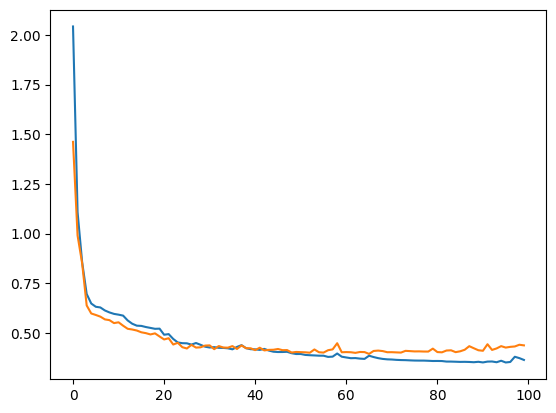

In [136]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

## the gap between two curves shows us overfitting

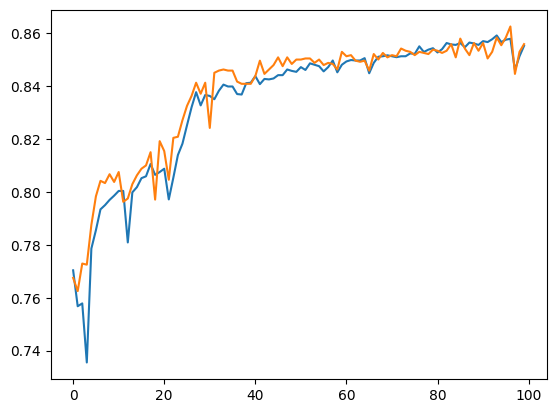

In [137]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])